<h1><center> Lab meeting 07-08-2022 </center></h1>
<h3><center> Gil Kanfer </center></h3>

In [19]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [1]:
# {
#     "tags": [
#         "hide-cell"
#     ]
# }
import pandas as pd
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

from jupyter_dash import JupyterDash
import dash
from dash import dcc 
from dash import html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
#sns.set()
import arviz as az
import pymc3 as pm
print(pm.__version__)
import theano.tensor as tt
import patsy

import os
import re
import glob
import random
import plotnine
from sklearn import preprocessing
from tqdm import tqdm

import plotnine 
import plotly.express as px

from skimage import measure, restoration,morphology
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

os.chdir('/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD

3.11.2
2022-07-13 17:44:15,111 [INFO] WRITING LOG OUTPUT TO /Users/kanferg/.cellpose/run.log


In [2]:
path_presentation_output = '/Users/kanferg/Desktop/NIH_Youle/Lab_meeting/20220709/Image_presentation'

In [5]:
hide_toggle(for_next=True)

In [4]:
path = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/Lab_meeting_images_070822'
pex_img = np.load(os.path.join(path,'comp_pex_seg.npy'))
fig = px.imshow(pex_img*4, binary_string=True, binary_backend="jpg",width=600,height=600,title='Typical Image of Peroxisome screen:')
fig.update_layout(title_x=0.5)
#fig.write_image(os.path.join(path_presentation_output,"Segmenet_image_pex.png"))

In [13]:
#save Image
path = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/Lab_meeting_images_070822'
pex_img = np.load(os.path.join(path,'comp_pex_seg.npy'))
# img_gs = img_as_ubyte(pex_img)
# PIL_image = Image.fromarray(img_gs,mode='RGB')
plt.imsave(os.path.join(path_presentation_output,"Segmenet_image_pex.png"),pex_img)

In [9]:
plt.imshow(PIL_image*10)

TypeError: unsupported operand type(s) for *: 'Image' and 'int'

### Using DNN we get very high accuracy but we got a prediction problem

In [30]:
df = pd.DataFrame({"y":np.random.uniform(0,500,1000), "x":np.random.uniform(0,500,1000), "class":'normal'})
import random
ind = np.linspace(0,500,500,dtype='int').tolist()
random.shuffle(ind)
df.loc[ind[:9],'class'] = 'pheno'
df['FN'] = 0
df.loc[ind[9],'FN'] = 1
df.loc[ind[9],'FN'] = 1
df['FP'] = 0
df.loc[ind[10:99],'FP'] = 1

In [6]:
hide_toggle(for_next=True)

In [31]:
import plotly.graph_objects as go
pheno_actual = go.Scatter(x = df.loc[df['class']=='pheno','x'],
                          y = df.loc[df['class']=='pheno','y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10})
normal_actual = go.Scatter(x = df.loc[df['class']=='normal','x'],
                    y = df.loc[df['class']=='normal','y'],
                    mode = 'markers',
                    name = 'Normal',
                    marker = {'color':'blue','size':5})
                                  
data = [pheno_actual,normal_actual]
layout = go.Layout(title = 'Medical Test Paradox \n Acuuracy ≠ Predictive',
                   showlegend= True,
                  xaxis={'showgrid':False,'range':[0,500]},
                   yaxis={'showgrid':False,'range':[0,500]},
                   height=500,
                   width = 500
                  )
fig = go.Figure(data = data,layout = layout)
fig.show()

In [7]:
hide_toggle(for_next=True)

In [36]:
import plotly.graph_objects as go
pheno_actual = go.Scatter(x = df.loc[df['class']=='pheno','x'],
                          y = df.loc[df['class']=='pheno','y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10})
normal_actual = go.Scatter(x = df.loc[df['class']=='normal','x'],
                    y = df.loc[df['class']=='normal','y'],
                    mode = 'markers',
                    name = 'Normal',
                    marker = {'color':'blue','size':5})
                                  
data = [pheno_actual,normal_actual]
layout = go.Layout(title = 'Actual phenotpyic cells: 10',
                   showlegend= True,
                  xaxis={'showgrid':False,'range':[0,500]},
                   yaxis={'showgrid':False,'range':[0,500]},
                   height=500,
                   width = 500
                  )
fig = go.Figure(data = data,layout = layout)
fig.show()

In [10]:
hide_toggle(for_next=True)

In [11]:
hide_toggle(for_next=True)

In [38]:
import plotly.graph_objects as go
pheno_FN = go.Scatter(x = df.loc[df['FN']==1,'x'],
                          y = df.loc[df['FN']==1,'y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10})
pheno_actual = go.Scatter(x = df.loc[df['class']=='pheno','x'],
                          y = df.loc[df['class']=='pheno','y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10,'opacity':0.2})
normal_actual = go.Scatter(x = df.loc[df['class']=='normal','x'],
                    y = df.loc[df['class']=='normal','y'],
                    mode = 'markers',
                    name = 'Normal',
                    marker = {'color':'blue','size':5,'opacity':0.2})
                                  
data = [pheno_actual,normal_actual,pheno_FN]
layout = go.Layout(title = 'One cell is False Negative',
                   showlegend= True,
                  xaxis={'showgrid':False,'range':[0,500]},
                   yaxis={'showgrid':False,'range':[0,500]},
                   height=500,
                   width = 500
                  )
fig = go.Figure(data = data,layout = layout)
fig.show()

In [12]:
hide_toggle(for_next=True)

In [40]:
import plotly.graph_objects as go
pheno_FN = go.Scatter(x = df.loc[df['FN']==1,'x'],
                          y = df.loc[df['FN']==1,'y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10})
pheno_FP = go.Scatter(x = df.loc[df['FP']==1,'x'],
                          y = df.loc[df['FP']==1,'y'],
                            mode = 'markers',
                            name = 'Normal',
                            marker = {'color':'blue','size':10})

pheno_actual = go.Scatter(x = df.loc[df['class']=='pheno','x'],
                          y = df.loc[df['class']=='pheno','y'],
                            mode = 'markers',
                            name = 'penotype',
                            marker = {'color':'red','size':10,'opacity':0.2})
normal_actual = go.Scatter(x = df.loc[df['class']=='normal','x'],
                    y = df.loc[df['class']=='normal','y'],
                    mode = 'markers',
                    name = 'Normal',
                    marker = {'color':'blue','size':5,'opacity':0.2})
                                  
data = [pheno_actual,normal_actual,pheno_FN,pheno_FP]
layout = go.Layout(title = '89 cell were falsly predictied as postive (False Postive)',
                   showlegend= True,
                  xaxis={'showgrid':False,'range':[0,500]},
                   yaxis={'showgrid':False,'range':[0,500]},
                   height=500,
                   width = 500
                  )
fig = go.Figure(data = data,layout = layout)
fig.show()

$Sensitivity: \frac {9}{10} = 90\%$\
<br>
$Specificity: \frac {901}{990} = 91\%$
<br>
$Accuracy: \frac {9+901}{10+990} = 91\%$

What is the probability of correctly identifying a phenotypic cell ?

$ P(phenotype | observation) = \frac {9}{89+9} = \frac{TP}{TP+FP}  = \frac{1}{11} $\
A.K.A.  **Positive Predictive Value**

In [21]:
hide_toggle(for_next=True)

In [44]:
cells = 100_000
previlance = np.linspace(0.01,0.1,100).tolist()
sen = 0.96
spec = 0.96

def ppv(previlance,sen,spec,cells):
    actual_phen = np.round(previlance*cells)
    actual_norm = cells - actual_phen
    TP = int(0.96*actual_phen)
    FP = 0.04*actual_norm
    return TP/(TP + FP)
dict = {'previlance %':previlance,'Positive Predictive Value':[ppv(z,sen,spec,cells) for z in  previlance]}
df = pd.DataFrame(dict)

fig = px.scatter(df, x="previlance %", y="Positive Predictive Value", title = 'Effect of Prevalence increases on Prediction')
fig.show()

<h1><center> Granularity Bayes' model </center></h1>

- [x] Granularity measure concept
- [ ] Peroxisome image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior


In [41]:
#pex
path = '/Users/kanferg/Desktop/NIH_Youle/Lab_meeting/20220709/Pex_single_image'
# calculate mean redaction
def image_load(path,name):
    img = Image.open(os.path.join(path,name))
    imgGray = img.convert('L')
    pix = np.array(imgGray)
    return pix
def granularity_single(img_in,radius):
    '''
    Erosion and dilution process for calculating lost of single wen more opening is happening
    '''
    selem = morphology.disk(radius, dtype=bool)
    eros_pix = morphology.erosion(img_in, footprint=selem)
    rec = morphology.dilation(eros_pix, footprint=selem)
    return rec
img_norm = image_load(path,'mix_None20220429_120548exp001_13DKO_1-1.png')
img_pheno = image_load(path,'pheno_aAaVNwHW20220503_180649exp001_PEX3KO7_2-4.png')
img_norm = np.expand_dims(img_norm,0)
img_pheno = np.expand_dims(img_pheno,0)
img_con = np.concatenate((img_norm,img_pheno))

In [22]:
hide_toggle(for_next=True)

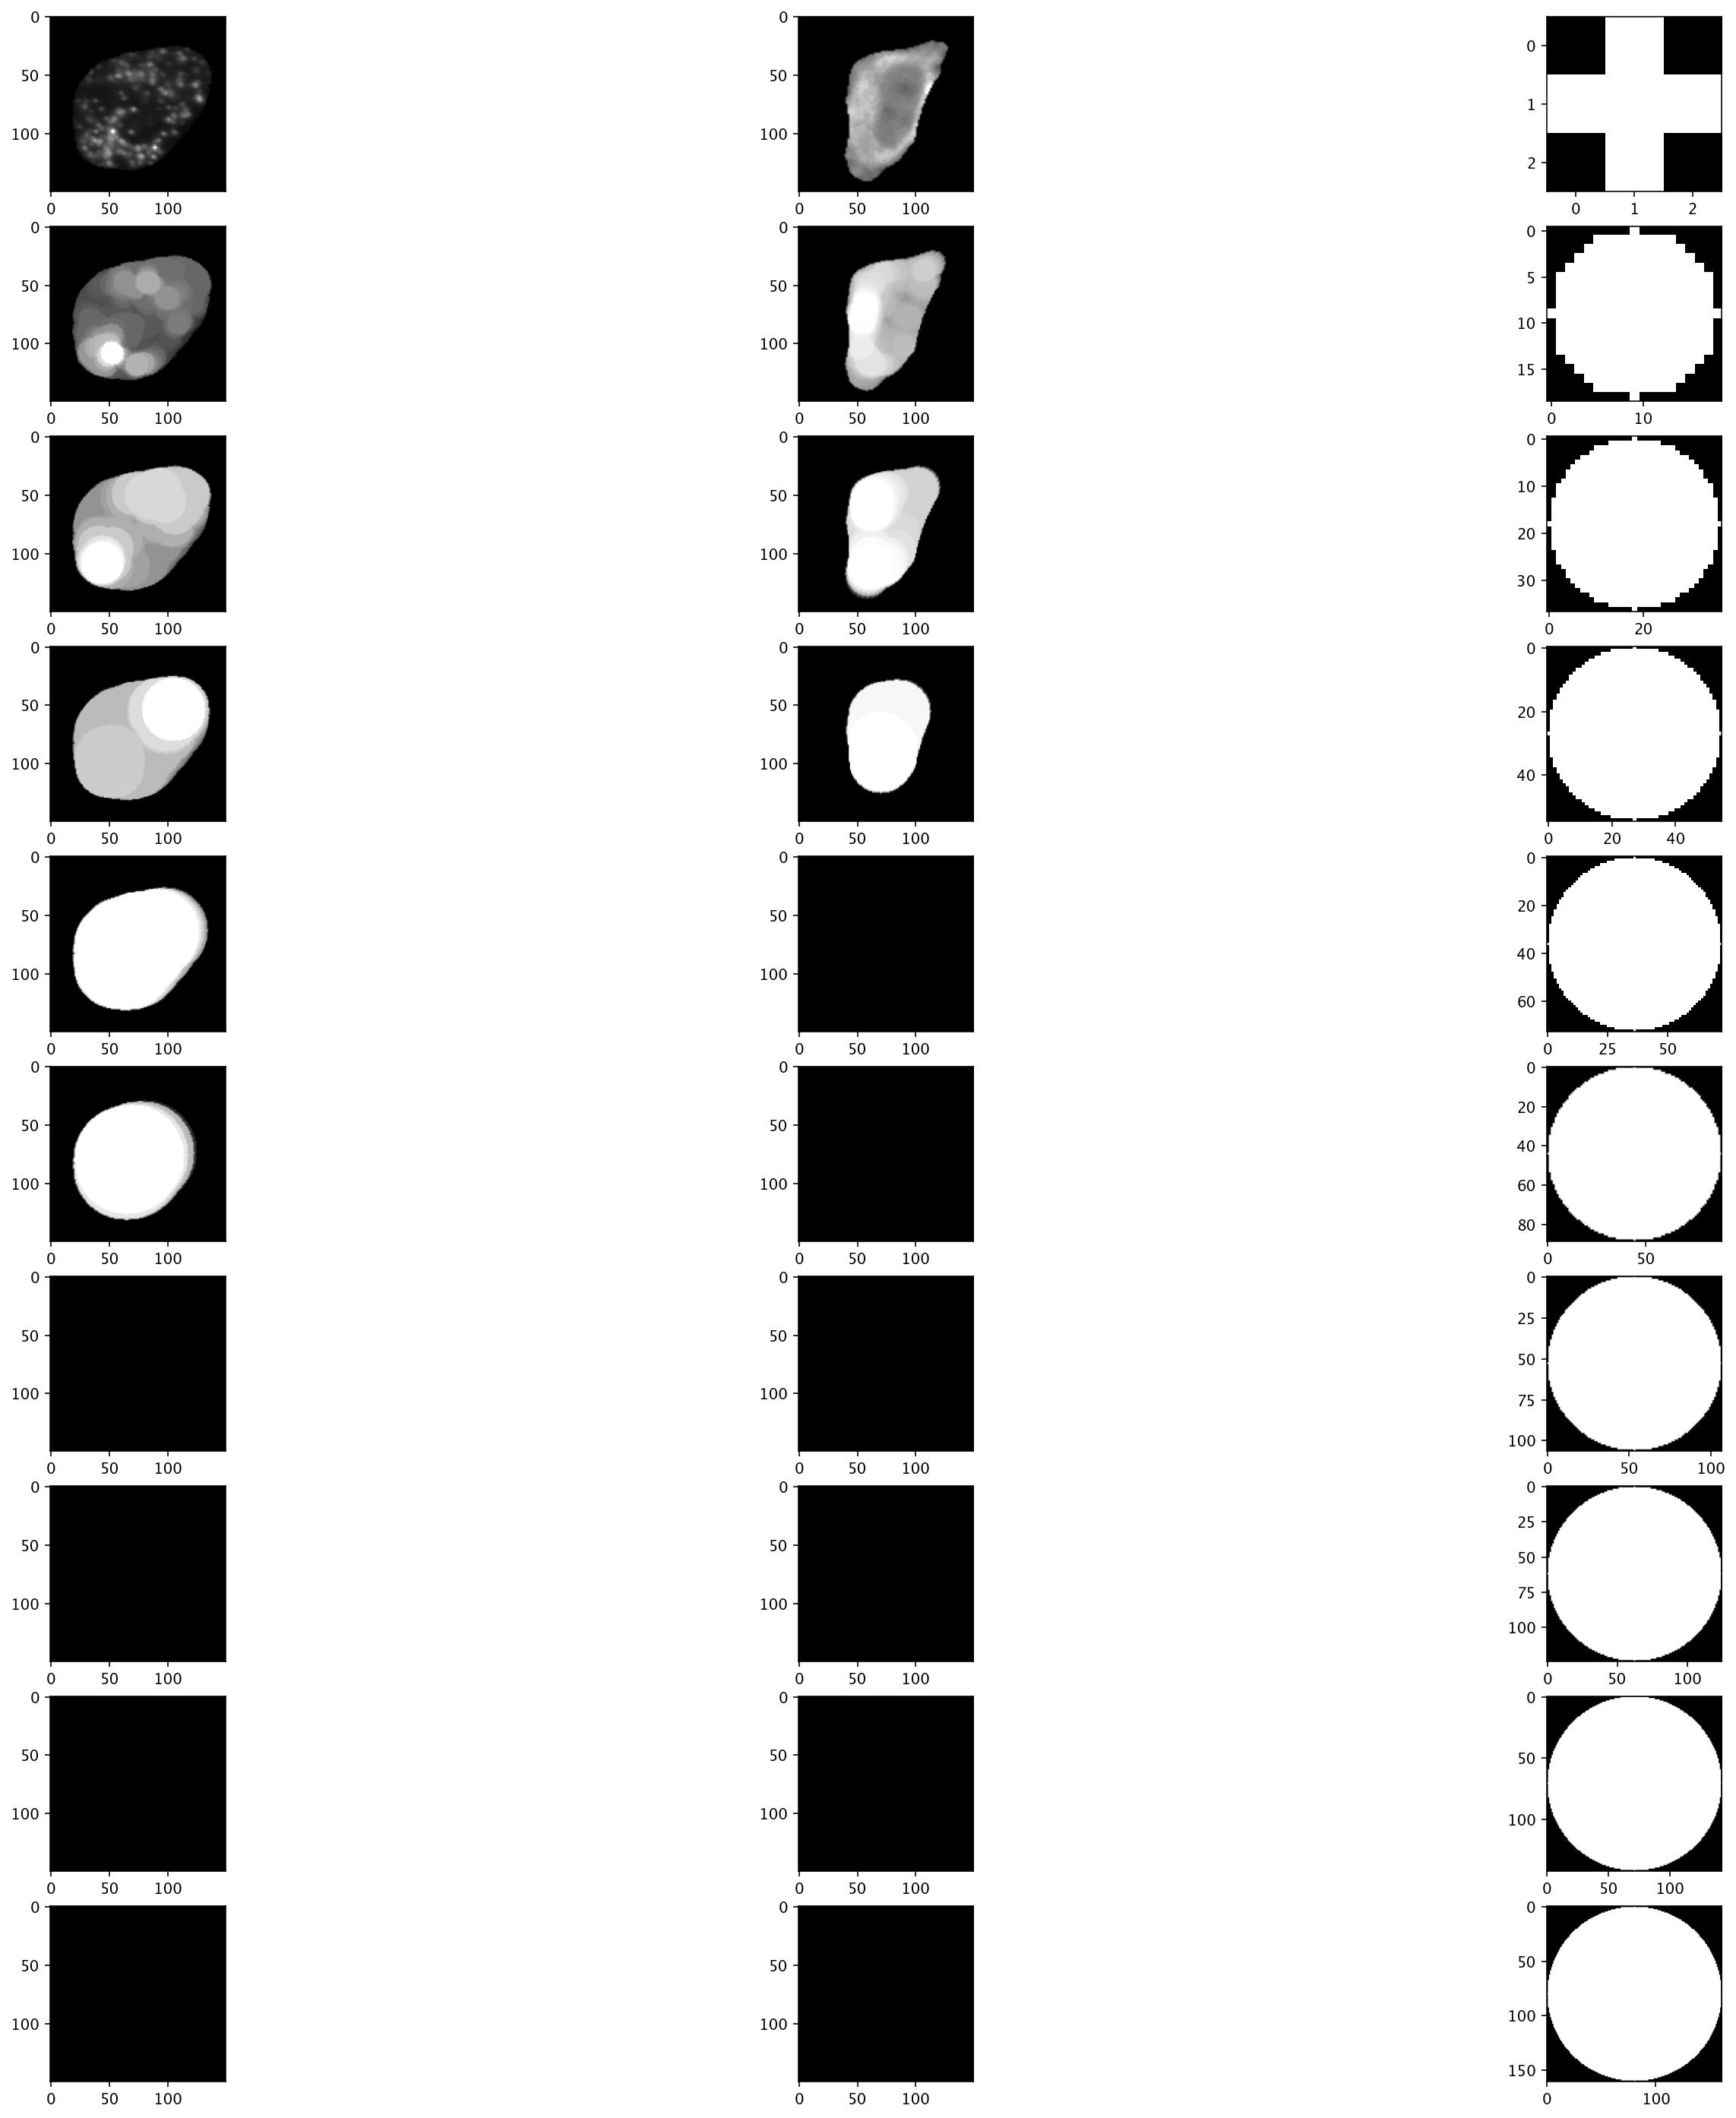

In [42]:
opening_sequance = np.linspace(1,80,10,dtype=int).tolist()
rows = np.linspace(0,10,10,endpoint=False,dtype = int)
cols = [0,1,2]
fig, ax = plt.subplots(10, 3, figsize=(25, 25))
for col in cols:
    for row in rows:
        if col==2:
            rec_temp_norm =  morphology.disk(opening_sequance[row], dtype=bool)
        else:
            rec_temp_norm = granularity_single(img_con[col,:,:],opening_sequance[row])
        ax[row][col].imshow(rec_temp_norm, cmap=plt.cm.gray)

In [2]:
path = '/Users/kanferg/Desktop/NIH_Youle/Lab_meeting/20220709/Pex_single_image'
path_df = '/Users/kanferg/Desktop/NIH_Youle/Lab_meeting/20220709'
def image_load(path,name):
    img = Image.open(os.path.join(path,name))
    imgGray = img.convert('L')
    pix = np.array(imgGray)
    return pix
img_norm = image_load(path,'mix_None20220429_120548exp001_13DKO_1-1.png')
img_pheno = image_load(path,'mix_None20220429_120548exp001_13DKO_1-1.png')
df_norm = pd.read_csv(os.path.join(path_df,'df_norm.csv'))
df_pheno = pd.read_csv(os.path.join(path_df,'df_pheno.csv'))

- [ ] Granularity measure concept
- [x] Peroxisome image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior

In [23]:
hide_toggle(for_next=True)


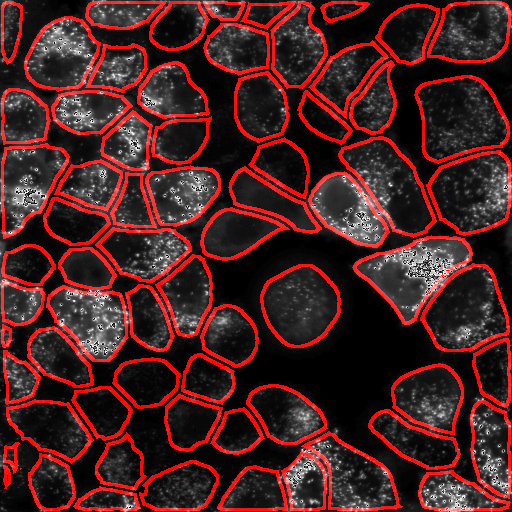

In [18]:
os.chdir(r'F:\HAB_2\PrinzScreen\training_classfication')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD
path_norm = r'F:\HAB_2\PrinzScreen\training_classfication\raw\mix\selected_images'
os.chdir(path_norm)
images_name = glob.glob("*.tif")

AIPS_pose_object = AC.AIPS_cellpose(Image_name = images_name[1], path= path_norm, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
# create mask for the entire image
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])
comp = AFD.Compsite_display(input_image = img[0,:,:], mask_roi = mask).draw_ROI_contour(channel=0)
fig = px.imshow(comp*4, binary_string=True, binary_backend="jpg",width=600,height=600,title='Gfp-Cat',binary_compression_level=1)
fig.update_layout(title_x=0.5,dragmode="drawrect")

- [ ] Granularity measure concept
- [ ] Peroxisome image
- [x] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior

In [2]:
import pandas as pd
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 500)

from jupyter_dash import JupyterDash
import dash
from dash import dcc 
from dash import html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
import arviz as az
import pymc3 as pm
print(pm.__version__)
import theano.tensor as tt
import patsy

import os
import re
import glob
import random
import plotnine
from sklearn import preprocessing
from tqdm import tqdm

import plotnine 
from plotnine.data import economics 
from plotnine import * 
import plotly.express as px

from skimage import measure, restoration,morphology

%config InlineBackend.figure_format = 'retina'

3.11.2


In [4]:
os.chdir('/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/beyes_table')
tabel_samp = pd.read_csv('Peroxisome_table_80opening_signale_reduction_25sample.csv')

In [ ]:
hide_toggle(for_next=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 531.28it/s]
F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


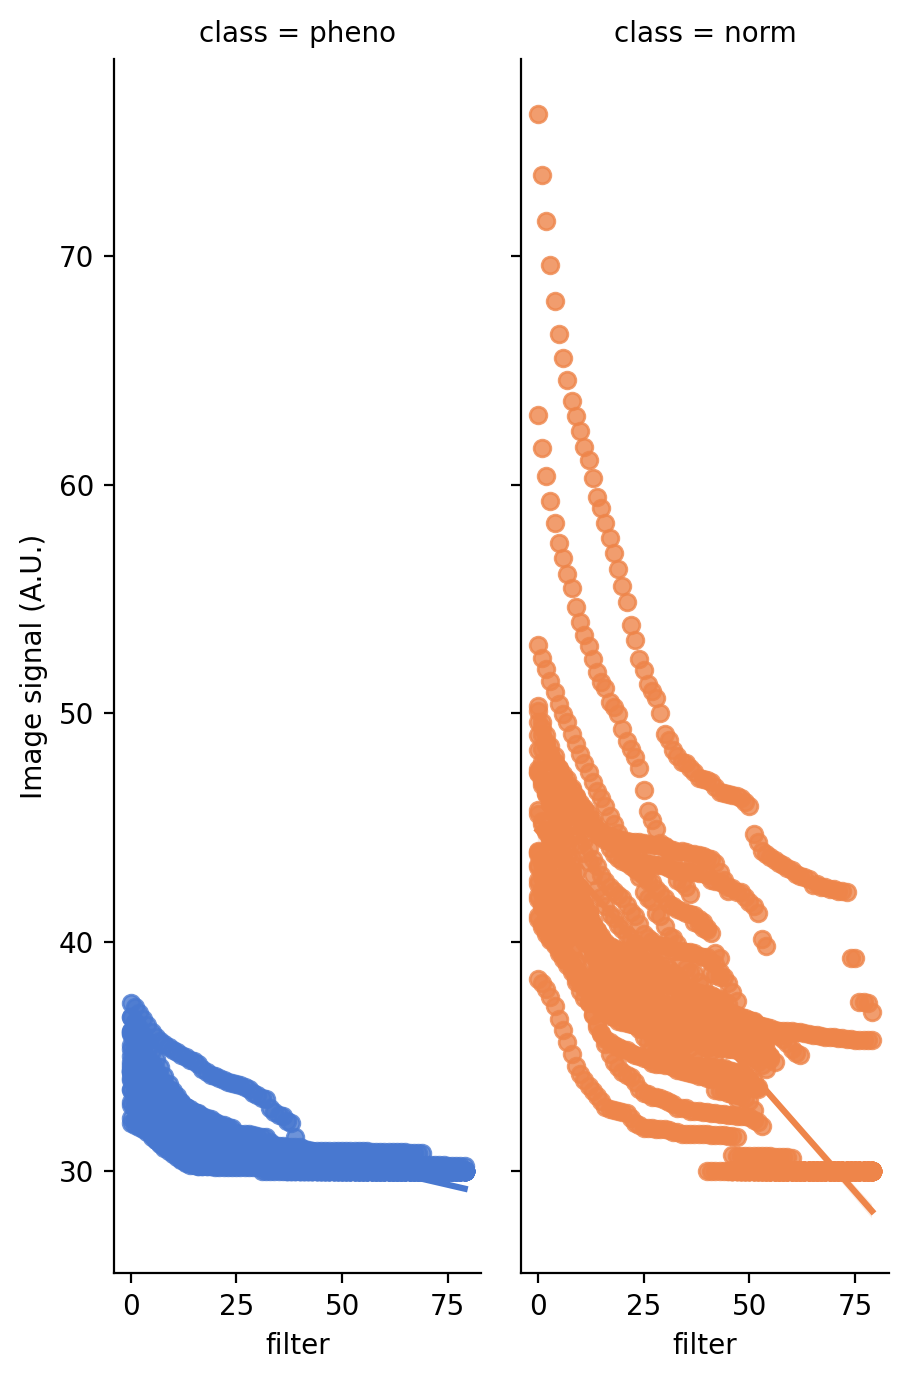

In [62]:
# Display decay plot
def add_class_randomise_and_pm_reconst(table_input, obser_number=10,show_class = True):
    from sklearn import preprocessing
    tabel_5samp = table_input
    image_group =  tabel_5samp['image_name'].values
    le = preprocessing.LabelEncoder()
    # encoding
    # class_name_encoded=le.fit_transform(class_name).tolist()
    image_group_encoded=le.fit_transform(image_group).tolist()


    # adding a uneaqe class column 
    image_group =  tabel_5samp['image_name'].values.tolist()
    image_group_cls = []
    for i,img in enumerate(image_group):
        image_group_cls.append(img.split('_')[0]+ '_'+str(image_group_encoded[i]))
    image_group_cls    
    tabel_5samp['image_name_cls'] = image_group_cls

     # data sorting
    un_name = np.unique(tabel_5samp['image_name_cls']).tolist()
    import random
    random.shuffle(un_name)
    un_name

    def restructure_table(table, unique_name):
        table_temp = table.loc[lambda x: (x['image_name_cls'] == unique_name),:]
        return table_temp
    table_train = restructure_table(tabel_5samp, un_name[0])
    for i in tqdm(range(1,obser_number)):
        table_temp = restructure_table(tabel_5samp, un_name[i])
        table_train = pd.concat((table_train,table_temp))

    from sklearn import preprocessing
    table_sel = table_train
    # class_name =  table_sel['class'].values
    image_group =  table_sel['image_name'].values
    le = preprocessing.LabelEncoder()
    # encoding
    # class_name_encoded=le.fit_transform(class_name).tolist()
    image_group_encoded=le.fit_transform(image_group).tolist()
    table_dict={'image_signal':table_sel.open_image_signal.values.tolist(),
                'raius_list':table_sel.radius_list.values.tolist(),
                'image_group':image_group_encoded}
    table = pd.DataFrame(table_dict)
    table['image_group'] = pd.Categorical(table['image_group'], ordered=False)

    image_group =  table_sel['image_name'].values.tolist()
    image_group_cls = []
    for i,img in enumerate(image_group):
        if show_class:
            image_group_cls.append(img.split('_')[0])
        else:
            image_group_cls.append(img.split('_')[0]+ '_'+str(image_group_encoded[i]))
    image_group_cls    
    table['image_name_cls'] = image_group_cls
    return table

    
df_display = add_class_randomise_and_pm_reconst(tabel_samp,obser_number=50,show_class=True )
df_display.rename({'image_name_cls': 'class'}, axis=1, inplace=True)
df_display.rename({'raius_list': 'filter',"image_signal":"Image signal (A.U.)"}, axis=1, inplace=True)
sns.set_palette("pastel")
sns.lmplot(x="filter", y="Image signal (A.U.)", col="class",hue='class', data=df_display, col_wrap=9, palette="muted", aspect=0.3, size=7)

### Model for image signal drop by opening operation

$y \sim a + c \times e^{-b*filter} + \sigma $\
a, intercept or image signal initiated\
b, decay rate\
c, constant\
$\sigma$, error \
---
- [ ] Granularity measure concept
- [ ] Peroxisome image
- [x] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior

### Model for 20 time points from 1 to 80

In [11]:
# Display decay plot
path = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/beyes_table'
tabel_samp = pd.read_csv(os.path.join(path,'Peroxisome_table_80opening_signale_reduction_25sample.csv'))
tabel_samp.head(1)
def add_class_randomise_and_pm_reconst(table_input, obser_number=10,show_class = False, vec=None):
    from sklearn import preprocessing
    tabel_5samp = table_input
    image_group =  tabel_5samp['image_name'].values
    le = preprocessing.LabelEncoder()
    # encoding
    # class_name_encoded=le.fit_transform(class_name).tolist()
    image_group_encoded=le.fit_transform(image_group).tolist()


    # adding a uneaqe class column 
    image_group =  tabel_5samp['image_name'].values.tolist()
    image_group_cls = []
    for i,img in enumerate(image_group):
        image_group_cls.append(img.split('_')[0]+ '_'+str(image_group_encoded[i]))
    image_group_cls    
    tabel_5samp['image_name_cls'] = image_group_cls

     # data sorting
    un_name = np.unique(tabel_5samp['image_name_cls']).tolist()
    import random
    random.shuffle(un_name)
    un_name

    def restructure_table(table, unique_name):
        table_temp = table.loc[lambda x: (x['image_name_cls'] == unique_name),:]
        return table_temp
    table_train = restructure_table(tabel_5samp, un_name[0])
    for i in tqdm(range(1,obser_number)):
        table_temp = restructure_table(tabel_5samp, un_name[i])
        table_train = pd.concat((table_train,table_temp))

    from sklearn import preprocessing
    table_sel = table_train
    # class_name =  table_sel['class'].values
    image_group =  table_sel['image_name'].values
    le = preprocessing.LabelEncoder()
    # encoding
    # class_name_encoded=le.fit_transform(class_name).tolist()
    image_group_encoded=le.fit_transform(image_group).tolist()
    table_dict={'image_signal':table_sel.open_image_signal.values.tolist(),
                'raius_list':table_sel.radius_list.values.tolist(),
                'image_group':image_group_encoded}
    table = pd.DataFrame(table_dict)
    table['image_group'] = pd.Categorical(table['image_group'], ordered=False)

    image_group =  table_sel['image_name'].values.tolist()
    image_group_cls = []
    for i,img in enumerate(image_group):
        if show_class:
            image_group_cls.append(img.split('_')[0])
        else:
            image_group_cls.append(img.split('_')[0]+ '_'+str(image_group_encoded[i]))
    image_group_cls    
    table['image_name_cls'] = image_group_cls
    table_vec_1 = table.loc[table['raius_list'].isin(vec),:]
    return table_vec_1

vec_2 = np.linspace(1,80,80,endpoint=True,dtype=int )    
table_draft = add_class_randomise_and_pm_reconst(tabel_samp,obser_number=50, show_class = True, vec = vec_2)

100%|██████████████████████████████████████████| 49/49 [00:00<00:00, 784.35it/s]


In [24]:
hide_toggle(for_next=True)

In [3]:
r = np.tile(np.linspace(1,80,80),5)
id_test = np.repeat(np.arange(0,5),80)
def exp_fun(a,b,c,r):
    return a + c*np.exp(-r*b)
a = np.random.normal(30,10,size = 5)
b = np.random.exponential(0.01,size = 5)
c = np.random.normal(0,10,size = 5)
y = exp_fun(a[id_test],b[id_test],c[id_test],r)
df = pd.DataFrame({'x':r,'y':y,'group':id_test})

app = JupyterDash(__name__)
app.layout = dbc.Container([
        html.H1("Estemating the Granularity model"),
        html.Hr(),
        dbc.Row([
            dbc.Col([
                dbc.Col([
                    dbc.Label("Mean of parameter a"),
                    dcc.Input(
                                id="a_mean",
                                type="number",
                                placeholder="enter the intercept paramter mean(around 30)",
                                value = 30,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Standard deviation of parameter a"),
                    dcc.Input(
                                id="a_sd",
                                type="number",
                                placeholder="enter the intercept paramter mean(around 10)",
                                value = 10,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Parameter b, exponantial distribution"),
                    dcc.Input(
                                id="b",
                                type="number",
                                placeholder="enter the reduction rate paramter b(exponantial, around 0.01)",
                                value = 0.01,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Mean of parameter c"),
                    dcc.Input(
                                id="c_mean",
                                type="number",
                                placeholder="enter the reduction rate paramter c mean(around 0)",
                                value = 0,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Standard deviation of parameter c"),
                    dcc.Input(
                                id="c_sd",
                                type="number",
                                placeholder="enter the reduction rate paramter c sd(around 10 )",
                                value = 10,
                                )], width={"size": 8}),
                    ]),
            dbc.Col([
                    dcc.Markdown(r'$y \sim a + c \times e^{-b*filter}$',dangerously_allow_html=True),
                    ]),
            dbc.Row([
                   html.Div([
                        dcc.Graph(
                                id='probability',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='simulation_plot_one_sample',
                                style={'width': '50%','display': 'inline-block'})]) 
                    ])
                ])
      ])
                    

@app.callback(
    [Output('simulation_plot_one_sample', 'figure'),
    Output('probability', 'figure')],
    [Input("a_mean", "value"),
     Input("a_sd", "value"),
    Input("b", "value"),
    Input("c_mean", "value"),
    Input("c_sd", "value")]
        )
def update_plot(a_mean,a_sd,b_,c_mean,c_sd):
    a = np.random.normal(a_mean,a_sd,size = 5)
    b = np.random.exponential(b_,size = 5)
    c = np.random.normal(c_mean,c_sd,size = 5)
    y = exp_fun(a[id_test],b[id_test],c[id_test],r)
    #
    y_ = exp_fun(a_mean,b_,c_mean,r)
    df_one_point = pd.DataFrame({'x':r,'y':y_,'a':a_mean, 'b':b_, 'c':c_mean})
    fig_one_point = px.scatter(df_one_point,x = 'x',y='y',hover_data=["a", "b","c"])
    df = pd.DataFrame({'x':r,'y':y,'group':id_test, 'a':a[id_test], 'b':b[id_test], 'c':c[id_test]})
    fig = px.scatter(df,x = 'x',y='y', color="group",hover_data=["a", "b", "c"])
    return [fig,fig_one_point]

app.run_server(mode='inline')

---
### **Bayesian model:**
$signal \sim Normal(y,\sigma)$\
$y = a + c \times e^{-b*filter} + \sigma $\
$a \sim Normal(50,30)$\
$b \sim Exponential(0.3)$\
$c \sim Normal(5,5)$\
$\sigma \sim Exponential(1)$\


- [ ] Granularity measure concept
- [ ] Peroxisome image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [X] Model
- [ ] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior

In [12]:
a = np.array(table_draft['image_group'])
_, idx = np.unique(a, return_index=True)
id__ = np.array(np.repeat(a[np.sort(idx)],79))
opening_opr__ = np.array(table_draft.raius_list.values) # 50*5
signal__ = np.array(table_draft.image_signal.values) # 50*5
id_paramaters__ = 50


print('id:{}'.format(len(id__))) #4000
print('opening_opr:{}'.format(len(opening_opr__))) # 50*5
print('signal:{}'.format(len(signal__)))

id:3950
opening_opr:3950
signal:3950


In [13]:
with pm.Model() as simple_model_decay:
    a = pm.Normal('a',50,30,shape= id_paramaters__)
    b = pm.Exponential('b',0.3,shape= id_paramaters__)
    c = pm.Normal('c',5,5,shape= id_paramaters__)
    
    mu = a[id__] + c[id__] * tt.exp(-b[id__] * opening_opr__)  # linear model
    sigma_within = pm.Exponential("sigma_within", 1.0)  # prior stddev within image
    signal = pm.Normal("signal", mu=mu, sigma=sigma_within, observed=signal__)  # likelihood
    
    id_paramaters = pm.Data("id_paramaters",id_paramaters__)
    id_ = pm.Data("id_",id__)
    opening_opr = pm.Data("opening_opr",opening_opr__)
    signal_ = pm.Data("signal_",signal__)
    
    trace_simple_model_decay = pm.sample(4000, tune=4000, target_accept=0.9)  # likelihood

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_4874/4119411121.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...


2022-07-09 16:32:59,185 [INFO] Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


2022-07-09 16:32:59,186 [INFO] Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


2022-07-09 16:33:02,771 [INFO] Multiprocess sampling (4 chains in 4 jobs)


NUTS: [sigma_within, c, b, a]


2022-07-09 16:33:02,773 [INFO] NUTS: [sigma_within, c, b, a]


/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 182 seconds.


2022-07-09 16:36:05,084 [INFO] Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 182 seconds.


In [32]:
# model simaple
import pickle
# model_fpath = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/beyes_table'
# with open(os.path.join(model_fpath,'Lab_meeting_peroxisome_simple_model_decay_50samples_80kernel.pkl'), 'wb') as buff:  
#     pickle.dump({'model': simple_model_decay, 'trace': trace_simple_model_decay, }, buff)
    
with open(os.path.join(model_fpath,'Lab_meeting_peroxisome_simple_model_decay_50samples_80kernel.pkl'), 'rb') as buff:  
    data = pickle.load(buff)  
model = data['model']  
trace = data['trace']  
with model:
    p_post = pm.sample_posterior_predictive(trace,var_names=["a","b","c",'sigma_within',"signal"],samples = 1000)



- [ ] Granularity measure concept
- [ ] Peroxisome image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [x] Posterior prediction analysis
- [ ] Live prediction on Image using Posterior parameter as Prior

In [28]:
with simple_model_decay:
    p_post = pm.sample_posterior_predictive(trace_simple_model_decay,var_names=["a","b","c",'sigma_within',"signal"],
                                            samples = 1000)

/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/pymc3/sampling.py:1689: UserWarning:

samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample



In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
table_draft = table_draft.sort_values(by=['image_group'])
uniqe_list_image_name = np.unique(table_draft['image_group'])
cls = []
for i in range(len(uniqe_list_image_name)):
    cls.append(np.unique(table_draft.loc[lambda x: (x['image_group'] == uniqe_list_image_name[i]),'image_name_cls'].tolist())[0])
cls_=le.fit_transform(cls).tolist()
print('{}'.format(len(b)))
print('{}'.format(len(b_sd)))
print('{}'.format(len(a)))
print('{}'.format(len(a_sd)))
print('{}'.format(len(c)))
print('{}'.format(len(c_sd)))
print('{}'.format(len(cls)))

50
50
50
50
50
50
50


In [17]:
hide_toggle(for_next=True)

In [31]:
from dash import Dash, dash_table
import plotly.express as px
b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
table_draft = table_draft.sort_values(by=['image_group'])
uniqe_list_image_name = np.unique(table_draft['image_group'])
cls = []
for i in range(len(uniqe_list_image_name)):
    cls.append(np.unique(table_draft.loc[lambda x: (x['image_group'] == uniqe_list_image_name[i]),'image_name_cls'].tolist())[0])

#cls_=le.fit_transform(cls).tolist()
cls_ = cls
df = pd.DataFrame({'a':a,'b':b,'c':c,'a_sd':a_sd,'b_sd':b_sd,"c_sd":c_sd,'Class':cls_,'Image':uniqe_list_image_name})
df['Class']=pd.Categorical(df['Class'], ordered=False)

app = JupyterDash(__name__)
app.layout = dbc.Container([
                    html.H1("Posterior prediction analysis"),
                    html.Div(id= 'hide', hidden = True),
                    dbc.Col([
                            dcc.Markdown(r'$y \sim a + c \times e^{-b*filter}$'),
                            ]),
                    html.Div([
                        dcc.Graph(
                                id='a_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='b_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='c_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                                ]),
                            ])
                    

@app.callback(
    [Output('a_Variabale', 'figure'),
    Output('b_Variabale', 'figure'),
    Output('c_Variabale', 'figure')],
    Input("hide", "active_cell"))
def update_plot(tbl):
    fig_a = px.scatter(df,x = 'a',y='Image', color="Class",error_x="a_sd")
    fig_b = px.scatter(df,x = 'b',y='Image', color="Class",error_x="b_sd")
    fig_b.update_xaxes(range=[0, 0.2])
    fig_c = px.scatter(df,x = 'c',y='Image', color="Class",error_x="c_sd")
    return [fig_a,fig_b,fig_c]

app.run_server(mode='inline')

In [40]:
b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
image_group = np.linspace(1,80,50).tolist()

fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    px.scatter(df,x = 'b',y='Image', color="Class",error_x="b_sd"),
    row=1, col=1)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'error_x': {'array': array([8.83669211e-03, 6.52722143e-03, 1.72913012e-02, 9.04209048e-03,
                                          3.04276579e-03, 5.97142739e-03, 1.55952597e-02, 1.00197635e-02,
                                          1.59120929e-02, 8.35866900e-03, 6.15182368e-03, 4.07783991e-03,
                                          8.30185601e-03, 5.58795745e-03, 4.68117982e-03, 5.35115733e-03,
                                          1.37430252e-02, 9.62491139e-03, 6.08748466e-03, 5.30539637e-03,
                                          1.41533296e-02, 1.37013147e-02, 7.04898833e-03, 2.87180566e-03,
                                          3.40013706e+00, 7.07312397e-03])},
              'hovertemplate': 'Class=norm<br>b=%{x}<br>Image=%{y}<extra></extra>',
              'legendgroup': 'norm',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'norm',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.03127455, 0.02779997, 0.04317371, 0.03638154, 0.02059572, 0.02506052,
                          0.04121221, 0.0343706 , 0.0526363 , 0.03000963, 0.02900658, 0.02575851,
                          0.03177908, 0.02688748, 0.02319541, 0.02710603, 0.03592755, 0.03476437,
                          0.02576196, 0.02772   , 0.04095371, 0.03805434, 0.03520426, 0.02209682,
                          3.6071097 , 0.03080375]),
              'xaxis': 'x',
              'y': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19, 20, 21, 22, 23, 24, 25]),
              'yaxis': 'y'},
             {'error_x': {'array': array([3.39712213e-03, 3.24683225e-03, 2.89465500e-03, 8.28107946e-04,
                                          8.35240638e-04, 2.65108332e-03, 1.17191352e-02, 2.36357164e-03,
                                          3.23062747e+00, 4.46361599e-03, 4.61844101e-03, 4.56150743e-03,
                                          1.09849879e-03, 1.77600630e-03, 1.81159470e-03, 2.86769344e-03,
                                          3.63472464e-03, 2.99482954e-03, 2.88219114e-03, 2.46498477e-03,
                                          1.71300009e-03, 1.42576379e-03, 4.17805423e-03, 6.23607044e-03])},
              'hovertemplate': 'Class=pheno<br>b=%{x}<br>Image=%{y}<extra></extra>',
              'legendgroup': 'pheno',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'pheno',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([0.02507249, 0.03072804, 0.02729839, 0.01757112, 0.0192676 , 0.02367514,
                          0.04101863, 0.02626222, 3.41853564, 0.03047632, 0.02992532, 0.03262831,
                          0.01927528, 0.02316463, 0.02570562, 0.03290649, 0.03072103, 0.02821595,
                          0.02913106, 0.02173335, 0.02316405, 0.02355716, 0.02577633, 0.03385026]),
              'xaxis': 'x',
              'y': array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
                          44, 45, 46, 47, 48, 49]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'Class'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'b'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Image'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scattersmith',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [36]:
np.linspace(1,80,50).tolist()

[1.0,
 2.612244897959184,
 4.224489795918368,
 5.836734693877551,
 7.448979591836735,
 9.061224489795919,
 10.673469387755102,
 12.285714285714286,
 13.89795918367347,
 15.510204081632653,
 17.122448979591837,
 18.73469387755102,
 20.346938775510203,
 21.959183673469386,
 23.571428571428573,
 25.183673469387756,
 26.79591836734694,
 28.408163265306122,
 30.020408163265305,
 31.63265306122449,
 33.244897959183675,
 34.857142857142854,
 36.46938775510204,
 38.08163265306123,
 39.69387755102041,
 41.30612244897959,
 42.91836734693877,
 44.53061224489796,
 46.142857142857146,
 47.755102040816325,
 49.36734693877551,
 50.97959183673469,
 52.59183673469388,
 54.204081632653065,
 55.816326530612244,
 57.42857142857143,
 59.04081632653061,
 60.6530612244898,
 62.26530612244898,
 63.87755102040816,
 65.48979591836735,
 67.10204081632654,
 68.71428571428571,
 70.3265306122449,
 71.93877551020408,
 73.55102040816327,
 75.16326530612245,
 76.77551020408163,
 78.38775510204081,
 80.0]

- [ ] Granularity measure concept
- [ ] Peroxisome image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [x] Live prediction on Image using Posterior parameter as Prior

In [18]:
os.chdir('/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD

In [32]:
def pm_table_from_image(path,kernel_size=20):
    os.chdir(path)
    images_name = glob.glob("*.tif")

    AIPS_pose_object = AC.AIPS_cellpose(Image_name = images_name[1], path= path, model_type="cyto", channels=[0,0])
    img = AIPS_pose_object.cellpose_image_load()
    # create mask for the entire image
    mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])
    table_gran_temp = AIPS_pose_object.measure_properties(input_image=img[0,:,:])
    table_gran = pd.DataFrame(table_gran_temp['mean_int'].tolist())
    open_vec = np.linspace(1, 80, kernel_size, endpoint=False, dtype=int)
    for i in range(1, len(open_vec)):
        selem = morphology.disk(open_vec[i], dtype=bool)
        eros_pix = morphology.erosion(img[0,:,:], selem=selem)
        rec = morphology.dilation(eros_pix, selem=selem)
        table_gran_temp = AIPS_pose_object.measure_properties(input_image=rec)
        table_gran[int(open_vec[i])] = table_gran_temp['mean_int'].tolist()
    table_ = pd.DataFrame({'label':table.index.values,'area':table['area'].values,'centroid-0':table['centroid-0'].values,'centroid-1':table['centroid-1'].values})
    table_gran_comp = pd.concat((table_,table_gran),1)
    table_gran_comp = table_gran_comp.melt(id_vars=["label", "area","centroid-0","centroid-1"])
    table_out = table_gran_comp.sort_values(['label','variable']).reset_index(drop=True)
    table_out = table_out.rename(columns={"label":"image_group","variable": "raius_list", "value": "image_signal"})
    from sklearn import preprocessing
    table_sel = table_out
    # class_name =  table_sel['class'].values
    image_group =  table_sel['image_group'].values
    le = preprocessing.LabelEncoder()
    # encoding
    # class_name_encoded=le.fit_transform(class_name).tolist()
    image_group_encoded=le.fit_transform(image_group).tolist()
    table_dict={'image_signal':table_sel.image_signal.values.tolist(),
                'raius_list':table_sel.raius_list.values.tolist(),
                'image_group':image_group_encoded}
    table_fin = pd.DataFrame(table_dict)
    table_fin['image_group'] = pd.Categorical(table_fin['image_group'], ordered=False)
    return table_fin, mask, img,table_
    

In [33]:
path_norm = r'/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/mix_peroxisome'
table_img, mask,img, table = pm_table_from_image(path_norm,kernel_size=20)

2022-07-05 16:15:36,765 [INFO] TORCH CUDA version not installed/working.
2022-07-05 16:15:36,766 [INFO] >>>> using CPU
2022-07-05 16:15:36,815 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2022-07-05 16:18:45,810 [INFO] estimated cell diameter(s) in 188.99 sec
2022-07-05 16:18:45,813 [INFO] >>> diameter(s) = 
2022-07-05 16:18:45,814 [INFO] [ 65.68 ]
2022-07-05 16:18:45,814 [INFO] ~~~ FINDING MASKS ~~~
2022-07-05 16:20:52,081 [INFO] >>>> TOTAL TIME 315.27 sec


/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:14: FutureWarning:

`selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:15: FutureWarning:

`selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:14: FutureWarning:

`selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:15: FutureWarning:

`selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:14: FutureWarning:

`selem` is a deprecated 

/var/folders/6_/w5ms83bj03n3_2rqmn15v52hsbhpl5/T/ipykernel_81087/415798516.py:19: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



In [34]:
model_fpath = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/beyes_table'
table_img.to_csv(os.path.join(model_fpath,'lab_meeting_table_img.csv'))
table.to_csv(os.path.join(model_fpath,'lab_meeting_table.csv'))
np.save('lab_meeting_mask.npy', mask)
np.save('lab_meeting_img.npy', img)

In [7]:
model_fpath = '/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/beyes_table'
table_img = pd.read_csv(os.path.join(model_fpath,'lab_meeting_table_img.csv'))
table = pd.read_csv(os.path.join(model_fpath,'lab_meeting_table.csv'))


In [6]:
path_norm = r'/Users/kanferg/Desktop/NIH_Youle/Python_projacts_general/cellpose/cellpose_aips-main/mix_peroxisome'
os.chdir(path_norm)
mask = np.load('lab_meeting_mask.npy')
img = np.load('lab_meeting_img.npy')
np.shape(img)

(2, 2964, 2970)

In [45]:
table_img_log = table_img
table_img_log['image_signal_float'] = table_img_log.image_signal.values/2**16
table_img_log.head(50)

,Unnamed: 0,image_signal,raius_list,image_group,image_signal_float
0,0,1555.035714,0,0,0.023728
1,1,1399.821429,4,0,0.021360
2,2,1000.333333,8,0,0.015264
3,3,606.309524,12,0,0.009252
4,4,330.119048,16,0,0.005037
5,5,224.428571,20,0,0.003425
6,6,176.047619,24,0,0.002686
7,7,146.095238,28,0,0.002229
8,8,136.011905,32,0,0.002075
9,9,128.452381,36,0,0.001960


In [ ]:
unique_name = np.unique(table_img_log.image_group.values)
len(unique_name)

In [ ]:
table_img_log_ = table_img_log.loc[lambda x: (x['image_group'] == unique_name[0]),:]
for i in range(1,5):
    table_img_log_temp = table_img_log.loc[lambda x: (x['image_group'] == unique_name[i]),:]
    table_img_log_ = pd.concat((table_img_log_,table_img_log_temp))

In [44]:
table_img_log_

,Unnamed: 0,Image signal (A.U.),filter,image_group,Image signal (A.U.)
0,0,1555.035714,0,0,0.023728
1,1,1399.821429,4,0,0.021360
2,2,1000.333333,8,0,0.015264
3,3,606.309524,12,0,0.009252
4,4,330.119048,16,0,0.005037
...,...,...,...,...,...
95,95,134.692839,60,4,0.002055
96,96,134.297670,64,4,0.002049
97,97,133.737705,68,4,0.002041
98,98,132.821398,72,4,0.002027


In [41]:
df_display = table_img_log_
df_display.rename({'raius_list': 'filter'}, axis=1, inplace=True)
sns.lmplot(x='filter', y='image_signal_float', col="image_group", data=df_display, col_wrap=9, palette="muted", aspect=0.3, size=7)

/Users/kanferg/opt/anaconda3/envs/cellpose/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.


KeyError: "['image_signal_float'] not in index"

# Prior prediction analysis - image frame

Notebook for preforming out of sample prediction
From https://github.com/lucianopaz/pymcon/blob/master/source/Presentation.ipynb

In [ ]:
hide_toggle(for_next=True)

In [13]:
r = np.tile(np.linspace(1,80,80),5)
id_test = np.repeat(np.arange(0,5),80)
def exp_fun(a,b,c,r):
    return a + c*np.exp(-r*b)
a = np.random.normal(0.05,0.04,size = 5)
b = np.random.exponential(0.01,size = 5)
c = np.random.normal(0,10,size = 5)
y = exp_fun(a[id_test],b[id_test],c[id_test],r)
df = pd.DataFrame({'x':r,'y':y,'group':id_test})

app = JupyterDash(__name__)
app.layout = dbc.Container([
        html.H1("Estemating the Granularity model"),
        html.Hr(),
        dbc.Row([
            dbc.Col([
                dbc.Col([
                    dbc.Label("min of parameter a (uniform distributed)"),
                    dcc.Input(
                                id="a_min",
                                type="number",
                                placeholder="enter the intercept paramter mean(min)",
                                value = 0.01,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("max of parameter a"),
                    dcc.Input(
                                id="a_max",
                                type="number",
                                placeholder="enter the intercept paramter mean(max)",
                                value = 0.1,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Parameter b, exponantial distribution"),
                    dcc.Input(
                                id="b",
                                type="number",
                                placeholder="enter the reduction rate paramter b(exponantial, around 0.01)",
                                value = 0.01,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Mean of parameter c"),
                    dcc.Input(
                                id="c_mean",
                                type="number",
                                placeholder="enter the reduction rate paramter c mean(around 0)",
                                value = 0,
                                )], width={"size": 8}),
                dbc.Col([
                    dbc.Label("Standard deviation of parameter c"),
                    dcc.Input(
                                id="c_sd",
                                type="number",
                                placeholder="enter the reduction rate paramter c sd(around 10 )",
                                value = 0.07,
                                )], width={"size": 8}),
                    ]),
            dbc.Col([
                    dcc.Markdown(r'$y \sim a + c \times e^{-b*filter}$',mathjax=True),
                    ]),
            dbc.Row([
                   html.Div([
                        dcc.Graph(
                                id='probability',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='simulation_plot_one_sample',
                                style={'width': '50%','display': 'inline-block'})]) 
                    ])
                ])
      ])
                    

@app.callback(
    [Output('simulation_plot_one_sample', 'figure'),
    Output('probability', 'figure')],
    [Input("a_min", "value"),
     Input("a_max", "value"),
    Input("b", "value"),
    Input("c_mean", "value"),
    Input("c_sd", "value")]
        )
def update_plot(a_mean,a_sd,b_,c_mean,c_sd):
    a = np.random.uniform(a_mean,a_sd,size = 5)
    b = np.random.exponential(b_,size = 5)
    c = np.random.normal(c_mean,c_sd,size = 5)
    y = exp_fun(a[id_test],b[id_test],c[id_test],r)
    #
    y_ = exp_fun(a_mean,b_,c_mean,r)
    df_one_point = pd.DataFrame({'x':r,'y':y_,'a':a_mean, 'b':b_, 'c':c_mean})
    fig_one_point = px.scatter(df_one_point,x = 'x',y='y',hover_data=["a", "b","c"])
    df = pd.DataFrame({'x':r,'y':y,'group':id_test, 'a':a[id_test], 'b':b[id_test], 'c':c[id_test]})
    fig = px.scatter(df,x = 'x',y='y', color="group",hover_data=["a", "b", "c"])
    return [fig,fig_one_point]

app.run_server(mode='inline')

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
mtrand.pyx in numpy.random.mtrand.RandomState.exponential()

_common.pyx in numpy.random._common.cont()

_common.pyx in numpy.random._common.check_constraint()

ValueError: scale < 0

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
mtrand.pyx in numpy.random.mtrand.RandomState.exponential()

_common.pyx in numpy.random._common.cont()

TypeError: must be real number, not NoneType

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
mtrand.pyx in numpy.random.mtrand.RandomState.normal()

_common.pyx in numpy.random._common.cont()

TypeError: must be real number, not NoneType



In [14]:
table_img['image_signal_float'] = table_img.image_signal.values/2**16
aa = np.array(table_img['image_group'])
_, idx__ = np.unique(aa, return_index=True)
id__ = np.array(np.repeat(aa[np.sort(idx__)],20))
opening_opr__ = np.array(table_img.raius_list.values) # 69*20
opening_opr__ = opening_opr__ + 1
signal__ = np.array(table_img.image_signal_float.values) # 69*20
id_paramaters__ = 69

print('id:{}'.format(len(id__)))
print('opening_opr:{}'.format(len(opening_opr__)))
print('signal:{}'.format(len(signal__)))

id:1380
opening_opr:1380
signal:1380


In [15]:
with pm.Model() as simple_model_decay_:
    a = pm.Uniform('a',0.01,0.1,shape = id_paramaters__)
    b = pm.Exponential('b',0.3,shape = id_paramaters__)
    c = pm.Normal('c',0.1,0.05,shape = id_paramaters__)
    
    mu = a[id__] + c[id__] * tt.exp(-b[id__] * opening_opr__)  # linear model
    sigma_within = pm.Exponential("sigma_within", 1.0)  # prior stddev within image
    signal = pm.Normal("signal", mu=mu, sigma=sigma_within, observed=signal__) # likelihood
    
    id_paramaters = pm.Data("id_paramaters",id_paramaters__)
    id_ = pm.Data("id_",id__)
    opening_opr = pm.Data("opening_opr",opening_opr__)
    signal_ = pm.Data("signal_",signal__)
    
    trace_simple_model_decay_ = pm.sample(4000, tune=4000, target_accept=0.9)  # likelihood

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\deprecat\classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_within, c, b, a]


Sampling 4 chains for 4_000 tune and 4_000 draw iterations (16_000 + 16_000 draws total) took 234 seconds.
There were 885 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8328775658712618, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2695 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6544660039035184, but should be close to 0.9. Try to increase the number of tuning steps.
There were 3694 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3300567286320927, but should be close to 0.9. Try to increase the number of tuning steps.
There were 2530 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5038544603066222, but should be 

In [17]:
with simple_model_decay_:
    p_post = pm.sample_posterior_predictive(trace_simple_model_decay_,var_names=["a","b","c",'sigma_within',"signal"],
                                            samples = 1000)

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\pymc3\sampling.py:1709: UserWarning:

samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample



In [ ]:
hide_toggle(for_next=True)

In [19]:
from dash import Dash, dash_table
import plotly.express as px
b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
uniqe_list_image_name = np.unique(table_img['image_group'])

df = pd.DataFrame({'a':a,'b':b,'c':c,'a_sd':a_sd,'b_sd':b_sd,"c_sd":c_sd,'Image':uniqe_list_image_name})

app = JupyterDash(__name__)
app.layout = dbc.Container([
                    html.H1("Posterior prediction analysis"),
                    html.Div(id= 'hide', hidden = True),
                    dbc.Col([
                            dcc.Markdown(r'$y \sim a + c \times e^{-b*filter}$',mathjax=True),
                            ]),
                    html.Div([
                        dcc.Graph(
                                id='a_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='b_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='c_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                                ]),
                            ])
                    

@app.callback(
    [Output('a_Variabale', 'figure'),
    Output('b_Variabale', 'figure'),
    Output('c_Variabale', 'figure')],
    Input("hide", "active_cell"))
def update_plot(tbl):
    fig_a = px.scatter(df,x = 'a',y='Image', error_x="a_sd")
    fig_b = px.scatter(df,x = 'b',y='Image', error_x="b_sd")
    #fig_b.update_xaxes(range=[0, 0.2])
    fig_c = px.scatter(df,x = 'c',y='Image', error_x="c_sd")
    return [fig_a,fig_b,fig_c]

app.run_server(mode='inline')

# Display prediction on Image

In [25]:
table_pred = pd.concat((table,df),1)
table_pred

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,label,area,centroid0,centroid1,a,b,c,a_sd,b_sd,c_sd,Image
0,1,1318,29.242792,10.437785,0.010753,0.092957,0.027328,0.000652,0.076087,0.005061,0
1,2,2076,13.196532,121.621869,0.010441,0.073329,0.047729,0.000428,0.009341,0.004520,1
2,3,2516,25.619237,178.550477,0.010406,2.723520,0.090700,0.000346,2.319417,0.049743,2
3,4,797,9.365119,224.469260,0.010572,0.122430,0.042516,0.000520,0.027823,0.006031,3
4,5,1100,12.780000,265.556364,0.011056,2.249034,0.087545,0.000793,1.738182,0.049314,4
...,...,...,...,...,...,...,...,...,...,...,...
64,65,219,476.397260,6.410959,0.010356,4.473526,0.093255,0.000315,3.335322,0.050180,64
65,66,2649,491.243488,254.704039,0.010997,1.855323,0.087178,0.000750,1.165560,0.049395,65
66,67,28,469.142857,19.785714,0.010375,3.490289,0.100331,0.000333,2.474032,0.054376,66
67,68,2833,493.860219,456.029651,0.010486,0.083845,0.063478,0.000419,0.009755,0.004921,67


In [26]:


path = r'F:\HAB_2\PrinzScreen\training_classfication\raw\mix\selected_images'
os.chdir(path)
images_name = glob.glob("*.tif")
AIPS_pose_object = AC.AIPS_cellpose(Image_name = images_name[1], path= path, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
    # create mask for the entire image
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,:,:])


In [38]:
table_pred_c = table_pred
table_pred_c.rename({'c': 'predict'}, axis=1, inplace=True)
table_pred_c.rename({'centroid0': 'centroid-0','centroid1':'centroid-1'}, axis=1, inplace=True)
info_table, PIL_image = AIPS_pose_object.display_image_prediction(img[0,:,:] ,\
                                                                  prediction_table = table_pred_c, 
                                                                  font_select= "DejaVuSans.ttf", font_size = 24, windows=True, lable_draw = 'predict',round_n = 4)

In [48]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import skimage.io
from skimage import measure
import matplotlib.pyplot as plt
import glob
import pandas as pd
from scipy.stats import skew

from PIL import Image, ImageEnhance, ImageDraw,ImageFont
from skimage import io, filters, measure, color, img_as_ubyte
from skimage.draw import disk
from skimage import measure, restoration,morphology

In [40]:
table_pred_c

,label,area,centroid-0,centroid-1,a,b,predict,a_sd,b_sd,c_sd,Image
0,1,1318,29.242792,10.437785,0.010753,0.092957,0.027328,0.000652,0.076087,0.005061,0
1,2,2076,13.196532,121.621869,0.010441,0.073329,0.047729,0.000428,0.009341,0.004520,1
2,3,2516,25.619237,178.550477,0.010406,2.723520,0.090700,0.000346,2.319417,0.049743,2
3,4,797,9.365119,224.469260,0.010572,0.122430,0.042516,0.000520,0.027823,0.006031,3
4,5,1100,12.780000,265.556364,0.011056,2.249034,0.087545,0.000793,1.738182,0.049314,4
...,...,...,...,...,...,...,...,...,...,...,...
64,65,219,476.397260,6.410959,0.010356,4.473526,0.093255,0.000315,3.335322,0.050180,64
65,66,2649,491.243488,254.704039,0.010997,1.855323,0.087178,0.000750,1.165560,0.049395,65
66,67,28,469.142857,19.785714,0.010375,3.490289,0.100331,0.000333,2.474032,0.054376,66
67,68,2833,493.860219,456.029651,0.010486,0.083845,0.063478,0.000419,0.009755,0.004921,67


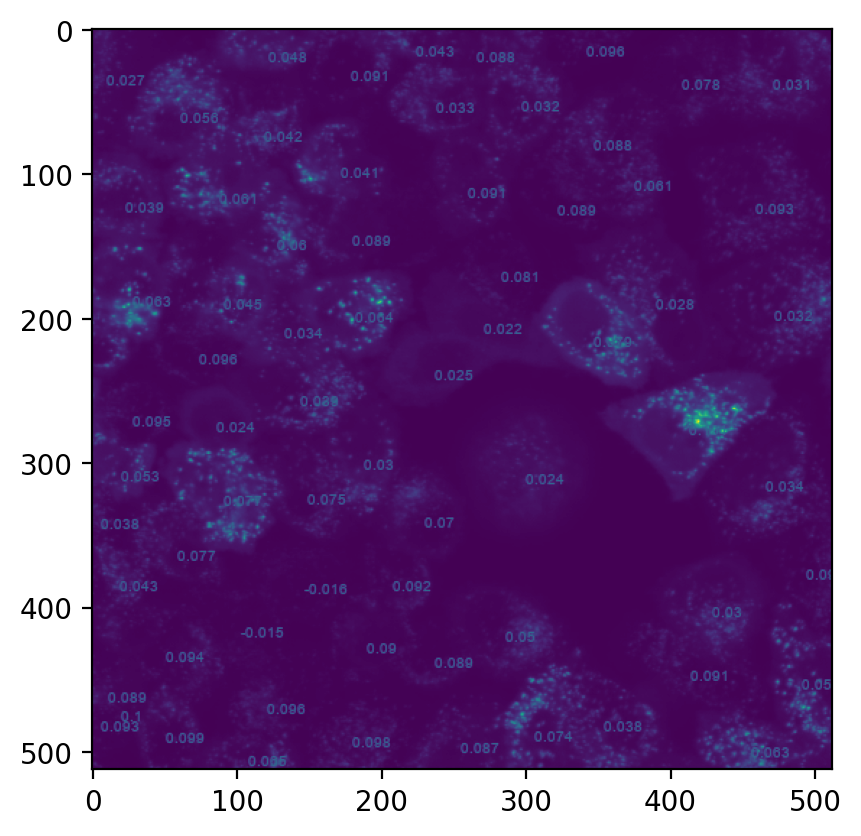

In [63]:
img_gs = img_as_ubyte(img[0,:,:])
round_n = 3
PIL_image = Image.fromarray(img_gs)
# round
info_table = table_pred_c.round({'centroid-0': 0, 'centroid-1': 0})
info_table['predict_round'] = info_table.loc[:, 'predict'].astype(float).round(round_n)
info_table['area_round'] = info_table.loc[:, 'area'].astype(float).round(round_n)
info_table = info_table.reset_index(drop=True)
draw = ImageDraw.Draw(PIL_image)
lable = 11
# use a bitmap font
font = ImageFont.truetype("arial.ttf", 10, encoding="unic")
for i in range(len(info_table)):
    draw.text((info_table.iloc[i, 3].astype('int64'), info_table.iloc[i, 2].astype('int64')),
              str(info_table.iloc[i, lable]), 'red', font=font)
plt.imshow(PIL_image)


In [64]:
info_table.loc[i,'predict']

0.06492780276360992

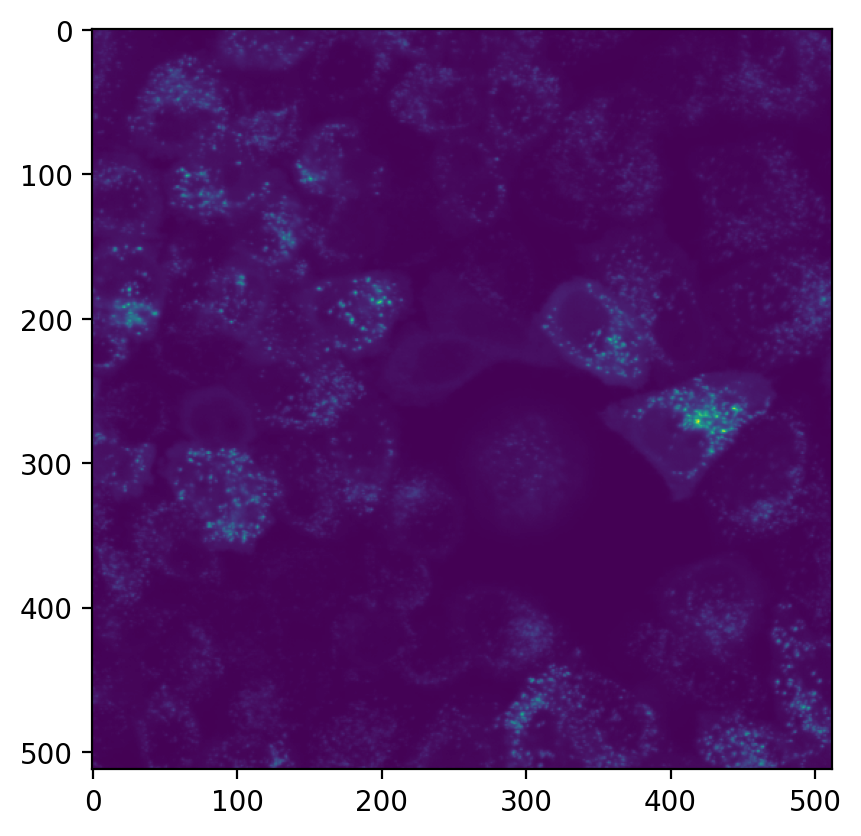

In [362]:
len(np.unique(table_img['raius_list']))

20

In [373]:
a = np.array(table_['image_group'])
_, idx = np.unique(a, return_index=True)
id__ = np.array(np.repeat(a[np.sort(idx)],20))
opening_opr__ = np.array(table_.raius_list.values) # 50*5
signal__ = np.array(table_.image_signal.values) # 50*5
id_paramaters__ = 69
print('id:{}'.format(len(id__))) #4000
print('opening_opr:{}'.format(len(opening_opr__))) # 50*80
print('signal:{}'.format(len(signal__)))
print('id_paramaters__:{}'.format(id_paramaters__))

id:1380
opening_opr:1380
signal:1380
id_paramaters__:69


In [365]:
opening_opr__[:1000]

array([2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66,
       70, 74, 78, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54,
       58, 62, 66, 70, 74, 78, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42,
       46, 50, 54, 58, 62, 66, 70, 74, 78, 2, 6, 10, 14, 18, 22, 26, 30,
       34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 2, 6, 10, 14, 18,
       22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 2, 6,
       10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74,
       78, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62,
       66, 70, 74, 78, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50,
       54, 58, 62, 66, 70, 74, 78, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38,
       42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 2, 6, 10, 14, 18, 22, 26,
       30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 2, 6, 10, 14,
       18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 2,
       6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46

In [366]:
a = np.array(table_draft['image_group'])
_, idx = np.unique(a, return_index=True)
id__ = np.array(np.repeat(a[np.sort(idx)],20))
opening_opr__ = np.array(table_draft.raius_list.values) # 50*5
signal__ = np.array(table_draft.image_signal.values) # 50*5
id_paramaters__ = 50


print('id:{}'.format(len(id__))) #4000
print('opening_opr:{}'.format(len(opening_opr__))) # 50*5
print('signal:{}'.format(len(signal__)))

id:1000
opening_opr:1000
signal:1000


In [388]:
with pm.Model() as model_test:
    a = pm.Normal('a',50,20,shape= id_paramaters__)
    b = pm.Exponential('b',0.3,shape=id_paramaters__)
    c = pm.Normal('c',5,10,shape= id_paramaters__)
    
    mu = a[id__] + c[id__] * tt.exp(-b[id__] * opening_opr__)  # linear model
    sigma_within = pm.Exponential("sigma_within", 1.0)  # prior stddev within image
    signal = pm.Normal("signal", mu=mu, sigma=sigma_within, observed=signal__)  # likelihood
    
    id_paramaters = pm.Data("id_paramaters",id_paramaters__)
    id_ = pm.Data("id_",id__)
    opening_opr = pm.Data("opening_opr",opening_opr__)
    signal_ = pm.Data("signal_",signal__)
    
    trace_test = pm.sample(1000, tune=200, target_accept=0.9)  # likelihood

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\deprecat\classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_within, c, b, a]


Sampling 4 chains for 200 tune and 1_000 draw iterations (800 + 4_000 draws total) took 102 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.99999999571375, but should be close to 0.9. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 46 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.0, but should be close to 0.9. Try to increase the number of tuning steps.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9999999985366662, but should be close to 0.9. Try to increase the number of tuning steps.
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance p

In [389]:
with model_test:
    p_post = pm.sample_posterior_predictive(trace_test,var_names=["a","b","c",'sigma_within',"signal"],samples = 1000)    

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\pymc3\sampling.py:1709: UserWarning:

samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample



In [390]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
table_draft = table_draft.sort_values(by=['image_group'])
uniqe_list_image_name = np.unique(table_draft['image_group'])
cls = []
for i in range(len(uniqe_list_image_name)):
    cls.append(np.unique(table_draft.loc[lambda x: (x['image_group'] == uniqe_list_image_name[i]),'image_name_cls'].tolist())[0])
cls_=le.fit_transform(cls).tolist()
print('{}'.format(len(b)))
print('{}'.format(len(b_sd)))
print('{}'.format(len(a)))
print('{}'.format(len(a_sd)))
print('{}'.format(len(c)))
print('{}'.format(len(c_sd)))
print('{}'.format(len(cls)))

69
69
69
69
69
69
50


In [391]:
from dash import Dash, dash_table
import plotly.express as px
b = np.mean(p_post['b'],0)
b_sd = np.std(p_post['b'],0)
c = np.mean(p_post['c'],0)
c_sd = np.std(p_post['c'],0)
a = np.mean(p_post['a'],0)
a_sd = np.std(p_post['a'],0)
uniqe_list_image_name = np.unique(table_img['image_group'])

df = pd.DataFrame({'a':a,'b':b,'c':c,'a_sd':a_sd,'b_sd':b_sd,"c_sd":c_sd,'Image':uniqe_list_image_name})

app = JupyterDash(__name__)
app.layout = dbc.Container([
                    html.H1("Posterior prediction analysis"),
                    html.Div(id= 'hide', hidden = True),
                    dbc.Col([
                            dcc.Markdown(r'$y \sim a + c \times e^{-b*filter}$',mathjax=True),
                            ]),
                    html.Div([
                        dcc.Graph(
                                id='a_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='b_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                        dcc.Graph(
                                id='c_Variabale',
                                style={'width': '50%','display': 'inline-block'}),
                                ]),
                            ])
                    

@app.callback(
    [Output('a_Variabale', 'figure'),
    Output('b_Variabale', 'figure'),
    Output('c_Variabale', 'figure')],
    Input("hide", "active_cell"))
def update_plot(tbl):
    fig_a = px.scatter(df,x = 'a',y='Image', error_x="a_sd")
    fig_b = px.scatter(df,x = 'b',y='Image', error_x="b_sd")
    #fig_b.update_xaxes(range=[0, 0.2])
    fig_c = px.scatter(df,x = 'c',y='Image', error_x="c_sd")
    return [fig_a,fig_b,fig_c]

app.run_server(mode='inline')

Conclusion: The variable b is a potential predictor for cell separation. Hence, improving prediction by including Covariant intercept and slop.\

https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking_2/Chp_14.ipynb \ 



In [ ]:
a = np.array(table_draft['image_group'])
_, idx = np.unique(a, return_index=True)
id__ = np.array(np.repeat(a[np.sort(idx)],5))
opening_opr__ = np.array(table_draft.raius_list.values) # 50*5
signal__ = np.array(table_draft.image_signal.values) # 50*5
id_paramaters__ = 50


print('id:{}'.format(len(id__))) #4000
print('opening_opr:{}'.format(len(opening_opr__))) # 50*5
print('signal:{}'.format(len(signal__)))

In [77]:
len(id__)

250

In [91]:
with pm.Model() as Multivariate_varying_effect:
    chol, Rho_, sigma_image = pm.LKJCholeskyCov("chol_cov", n=2, eta=2, sd_dist=pm.Exponential.dist(1.0), compute_corr=True)
    a = pm.Normal('a',80,30,shape = id_paramaters__)
    b = pm.Exponential('b',0.1,shape =id_paramaters__)
    c = pm.Normal('c',5,10, shape =id_paramaters__)
    ab_gren = pm.MvNormal("ab_gren", mu=tt.stack([b, c]), chol=chol, shape=(id_paramaters__,2))  # population of varying effects
#     mu = a[id__, 0] + ab_gren[id__, 1]*tt.exp(ab_gren[id__, 2] * opening_opr__)  # linear model
#     sigma_within = pm.Exponential("sigma_within", 1.0)  # prior stddev within image
#     signal = pm.Normal("signal", mu=mu, sigma=sigma_within, observed=signal__)  # likelihood
#     id_paramaters = pm.Data("id_paramaters",id_paramaters__)
#     id_ = pm.Data("id_",id__)
#     opening_opr = pm.Data("opening_opr",opening_opr__)
#     signal_ = pm.Data("signal_",signal__)
    trace_simple_model_decay = pm.sample(1)  # likelihood

ValueError: operands could not be broadcast together with shapes (50,2) (2,50) 

In [83]:
with Multivariate_varying_effect:
    idata = az.from_pymc3(trace_simple_model_decay)

In [84]:
idata

Inference data with groups:
	> posterior
	> sample_stats

In [68]:
with Multivariate_varying_effect:
    p_post = pm.sample_posterior_predictive(trace_simple_model_decay,var_names=["chol_cov"],
                                            samples = 1000)

In [69]:
np.shape(p_post['chol_cov'])

(1000, 6)

In [ ]:
x = p_post['ab_gren']
x[]

- [ ] Granularity measure concept
- [ ] Stress Granule (SG) image
- [ ] Exponential decay fit  
- [ ] Prior prediction analysis
- [ ] Model
- [ ] Posterior prediction analysis
- [x] Live prediction on Image using Posterior parameter as Prior

In [170]:
os.chdir(r'F:\HAB_2\PrinzScreen\training_classfication')
from utils import AIPS_cellpose as AC
from utils import AIPS_file_display as AFD

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\tqdm\auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

F:\Gil\anaconda\envs\pymc3_cellpose\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning:

Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.



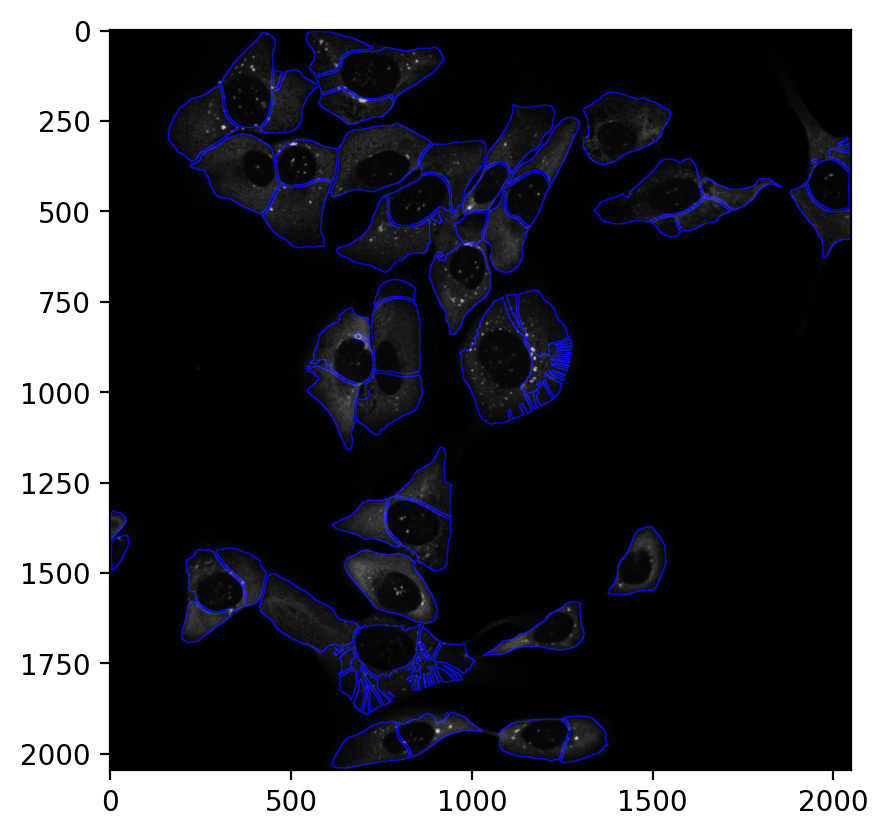

In [205]:
# load images
path_tif = r'E:\Elliot\classification\data\tif\mix_ask_elliot'
os.chdir(path_tif)
images_name = glob.glob("*.tif")
AIPS_pose_object = AC.AIPS_cellpose(Image_name = images_name[1], path= path_tif, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
# create mask for the entire image
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[:,:,1]*5)
comp = AFD.Compsite_display(input_image = img[:,:,1]*5, mask_roi = mask).draw_ROI_contour()
plt.imshow(comp)

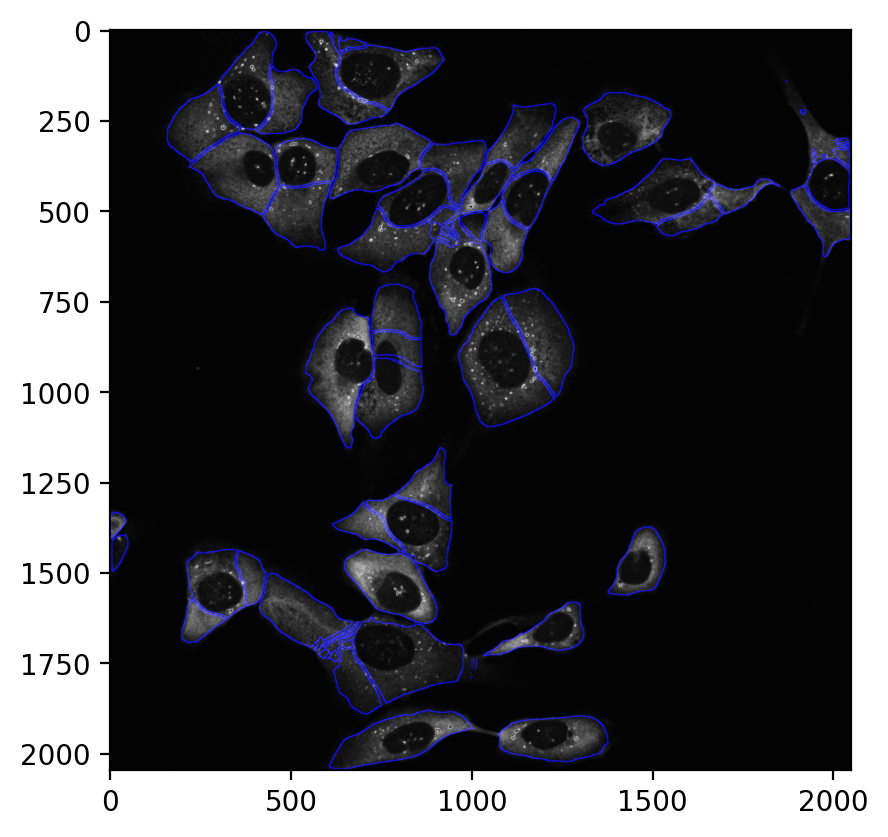

In [192]:
comp = AFD.Compsite_display(input_image = img[:,:,1]*5, mask_roi = mask).draw_ROI_contour()
plt.imshow(comp)

In [ ]:

image = skimage.io.imread(os.path.join(self.path,self.Image_name))